In [4]:
#import programs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# to import the raw data into pandas
SFOEMS = pd.read_csv('EMS_SFO_Data.csv', header=0)
SFOEMS.head()


,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,EMSUnits,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,0,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,0,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,0,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market


In [42]:
SFOEMS.dtypes

Address                             object
IncidentDate                        object
Incident day                        object
AlarmDt                             object
Alarm day                           object
AlarmTm                             object
ArrivalDt                           object
ArrivalTm                           object
CloseDt                             object
CloseTm                             object
Difference between arrival time     object
Zipcode                              int64
Battalion                           object
StationArea                        float64
SuppressionUnits                     int64
SuppressionPersonnel                 int64
EMSUnits                             int64
EMSPersonnel                         int64
OtherUnits                           int64
OtherPersonnel                       int64
Primary                              int64
Category                            object
PrimarySituation                    object
MutualAid  

In [33]:
# extract month from Indcident Date column and add month column
SFOEMS['month'] = pd.DatetimeIndex(SFOEMS['IncidentDate']).month
SFOEMS.head()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market,1
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,1
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,1
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1


In [7]:
#To create a dictionary of month to seasons
#season = {'Spring': [3, 4, 5],
         #'Summer': [6, 7, 8],
         #'Fall': [9, 10, 11],
         #'Winter': [12, 1, 2]}
#print(season)

In [18]:
#months_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
#def mapper(month):
    #return months_map[month]
#months_map

In [8]:
import calendar
SFOEMS['month'] = SFOEMS['month'].apply(lambda x: calendar.month_abbr[x])

In [34]:
season = {'Spring': ['Mar', 'Apr', 'May'],
         'Summer': ['Jun', 'Jul', 'Aug'],
         'Fall': ['Sep', 'Oct', 'Oct'],
         'Winter': ['Dec', 'Jan', 'Feb']}
print(season)

{'Spring': ['Mar', 'Apr', 'May'], 'Summer': ['Jun', 'Jul', 'Aug'], 'Fall': ['Sep', 'Oct', 'Oct'], 'Winter': ['Dec', 'Jan', 'Feb']}


In [35]:
#To add season column to df using append
SFOEMS['Season']=SFOEMS['month'].map(season)
SFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Season
63524,0 Taraval Street,12/31/2017,Sunday,12/31/2017,Sunday,11:12:06,12/31/2017,11:12:06,12/31/2017,11:37:30,...,0,0,324,EMS,motor vehicle accident with no injuries.,n none,7.0,West of Twin Peaks,12,NaN
63525,701 Taylor Street,12/31/2017,Sunday,12/31/2017,Sunday,23:27:39,12/31/2017,23:31:23,12/31/2017,23:42:24,...,0,0,700,False Alarm,"false alarm or false call, other",n none,3.0,Nob Hill,12,NaN
63526,0 Larkin Street,12/31/2017,Sunday,12/31/2017,Sunday,23:40:43,12/31/2017,23:44:17,1/1/2018,0:54:44,...,0,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Russian Hill,12,NaN
63527,0 Sawyer Street,12/31/2017,Sunday,12/31/2017,Sunday,17:37:54,12/31/2017,17:39:31,12/31/2017,18:28:38,...,0,0,300,EMS,"rescue, ems incident, other",n none,10.0,Visitacion Valley,12,NaN
63528,150 Loehr Street,12/31/2017,Sunday,12/31/2017,Sunday,12:30:40,12/31/2017,12:35:01,12/31/2017,12:42:06,...,0,0,651,Good Intent,"smoke scare, odor of smoke",n none,10.0,Visitacion Valley,12,NaN


In [36]:
SFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Season
63524,0 Taraval Street,12/31/2017,Sunday,12/31/2017,Sunday,11:12:06,12/31/2017,11:12:06,12/31/2017,11:37:30,...,0,0,324,EMS,motor vehicle accident with no injuries.,n none,7.0,West of Twin Peaks,12,NaN
63525,701 Taylor Street,12/31/2017,Sunday,12/31/2017,Sunday,23:27:39,12/31/2017,23:31:23,12/31/2017,23:42:24,...,0,0,700,False Alarm,"false alarm or false call, other",n none,3.0,Nob Hill,12,NaN
63526,0 Larkin Street,12/31/2017,Sunday,12/31/2017,Sunday,23:40:43,12/31/2017,23:44:17,1/1/2018,0:54:44,...,0,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Russian Hill,12,NaN
63527,0 Sawyer Street,12/31/2017,Sunday,12/31/2017,Sunday,17:37:54,12/31/2017,17:39:31,12/31/2017,18:28:38,...,0,0,300,EMS,"rescue, ems incident, other",n none,10.0,Visitacion Valley,12,NaN
63528,150 Loehr Street,12/31/2017,Sunday,12/31/2017,Sunday,12:30:40,12/31/2017,12:35:01,12/31/2017,12:42:06,...,0,0,651,Good Intent,"smoke scare, odor of smoke",n none,10.0,Visitacion Valley,12,NaN


(4000, 6000)

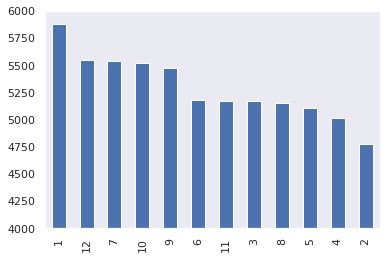

In [37]:
#to calculate calls by month
month_calls=SFOEMS['month'].value_counts().plot(kind='bar', grid=False)
plt.ylim(4000,6000)

(8000, 10000)

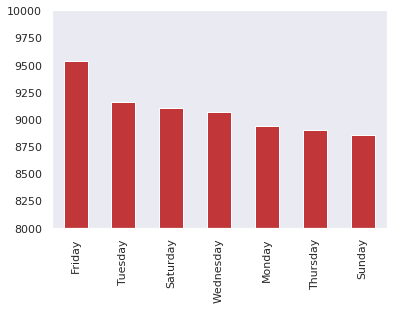

In [38]:
#to calculate calls by day of week
sns.set_palette('RdBu')
month_calls=SFOEMS['Incident day'].value_counts().plot(kind='bar', grid=False)
plt.ylim(8000,10000)

(8000, 10000)

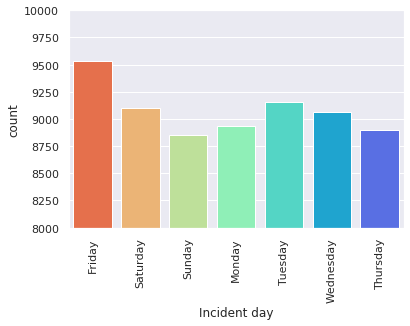

In [39]:
#to calculate number of calls by day - for staffing purposes
month_calls=sns.countplot(x='Incident day', data=SFOEMS, palette='rainbow_r')
plt.xticks(rotation=90)
plt.ylim(8000,10000)

In [15]:
zip_calls = pd.pivot_table(SFOEMS,values='Primary',index=['Category'], columns='Zipcode')
sns.heatmap(SFOEMS,cmap='YlGnBu')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [27]:
#to map call type vs zip code
#corr=SFOEMS.corr()
#sns.heatmap(xticklabels=SFOEMS['Zipcode'], yticklabels=SFOEMS['Category'], cmap='icefire_r')
import seaborn.matrix as smatrix

sns.set()

#zip_calls = sns.load_dataset(SFOEMS)
SFOEMS = zip_calls.pivot("Zipcodes", "Category")
SFOEMS = flights.reindex(zip_calls.iloc[:12].month)

columns = [1953,1955]
myflights = flights.copy()
mask = myflights.columns.isin(columns)
myflights.loc[:, ~mask] = 0
arr = flights.values
vmin, vmax = arr.min(), arr.max()
sns.heatmap(myflights, annot=True, fmt="d", vmin=vmin, vmax=vmax)
plt.show()


#sns.set(style='ticks')
#x=SFOEMS['Zipcode']
#y=SFOEMS['Category']
#sns.jointplot(x,y, kind='hex', color='#4cb391')

#zip_calls = SFOEMS.pivot('Zipcode', 'Category')
#ax= sns.heatmap(zip_calls)

KeyError: "None of ['Zipcodes', 'Category'] are in the columns"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

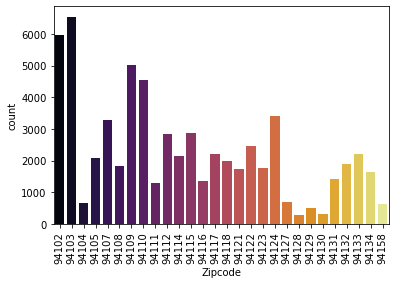

In [16]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

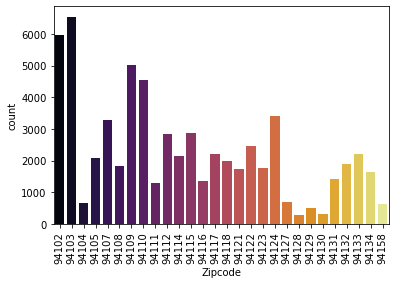

In [17]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

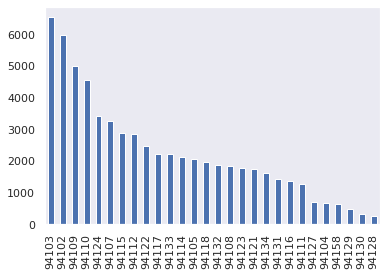

In [18]:
#to calculate calls by day of week
sns.set(color_codes=True)
month_calls=SFOEMS['Zipcode'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

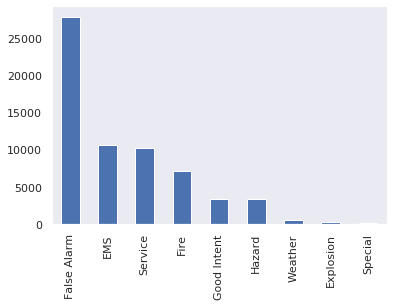

In [19]:
#to take the top 4 zip codes from above chart

sns.set(color_codes=True)
month_calls=SFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [35]:
sns.set(color_codes=True)
month_calls94103=SFOEMS['Zipcode']=='94103'
month_calls94103.head()
#month_calls94103=SFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

0    False
1    False
2    False
3    False
4    False
Name: Zipcode, dtype: bool

In [54]:
# create a seperate dataframe for top 4 zipcodes - zip1: 94103
top_zip1= SFOEMS.loc[SFOEMS['Zipcode'] == 94103]
top_zip1.shape

(6536, 28)

In [55]:
# create a seperate dataframe for top 4 zipcodes - zip2: 94102
top_zip2= SFOEMS.loc[SFOEMS['Zipcode'] == 94102]
top_zip2.shape

(5962, 28)

In [56]:
# create a seperate dataframe for top 4 zipcodes - zip3: 94109
top_zip3= SFOEMS.loc[SFOEMS['Zipcode'] == 94109]
top_zip3.shape

(5002, 28)

In [57]:
# create a seperate dataframe for top 4 zipcodes - zip4: 94110
top_zip4= SFOEMS.loc[SFOEMS['Zipcode'] == 94110]
top_zip4.shape

(4548, 28)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

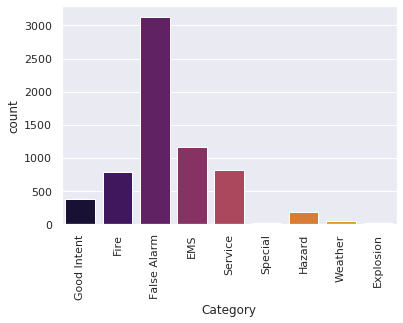

In [74]:
zip1_count=sns.countplot(x='Category', data=top_zip1, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

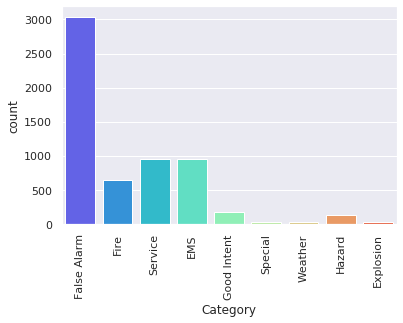

In [69]:
zip2_count=sns.countplot(x='Category', data=top_zip2, palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

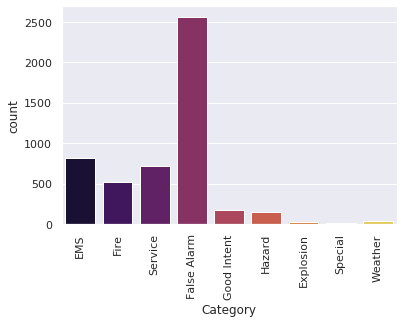

In [70]:
zip3_count=sns.countplot(x='Category', data=top_zip3, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

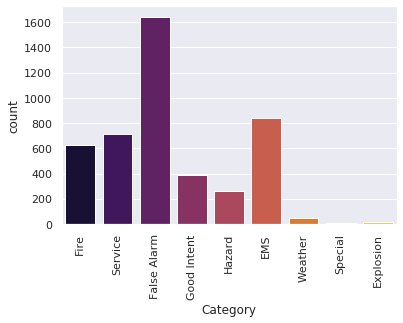

In [71]:
zip4_count=sns.countplot(x='Category', data=top_zip4, palette='inferno')
plt.xticks(rotation=90)